# Average Bubble

In [1]:
from bubble_tools import *
from experiment import *
from plotting import *

In [2]:
bubbleList, instantonList, tmpLoaded, indList = [], [], [], []
for tmp, temp in enumerate(tempList):
    lamb = lambList[tmp]

    tmpLoaded.append(tmp)
    bubbleList.append(np.load(average_bubble_file(nLat, lamb, phi0, temp)+'.npy'))
    instantonList.append(np.load(path_inst(nLat, lamb, phi0, temp)+'.npy'))
    indList.append(np.load(path_indcrit(nLat, lamb, phi0, temp)+'.npy'))

No handles with labels found to put in legend.
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: The following kwargs were not used by contour: 'ncontours'
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
/home/dpirvu/.local/lib/python3.7/site-packages/mpl_toolkits/axes_grid1/axes_grid.py:51: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar
No handles with labels found to put in legend.
No handles with labels found to put i

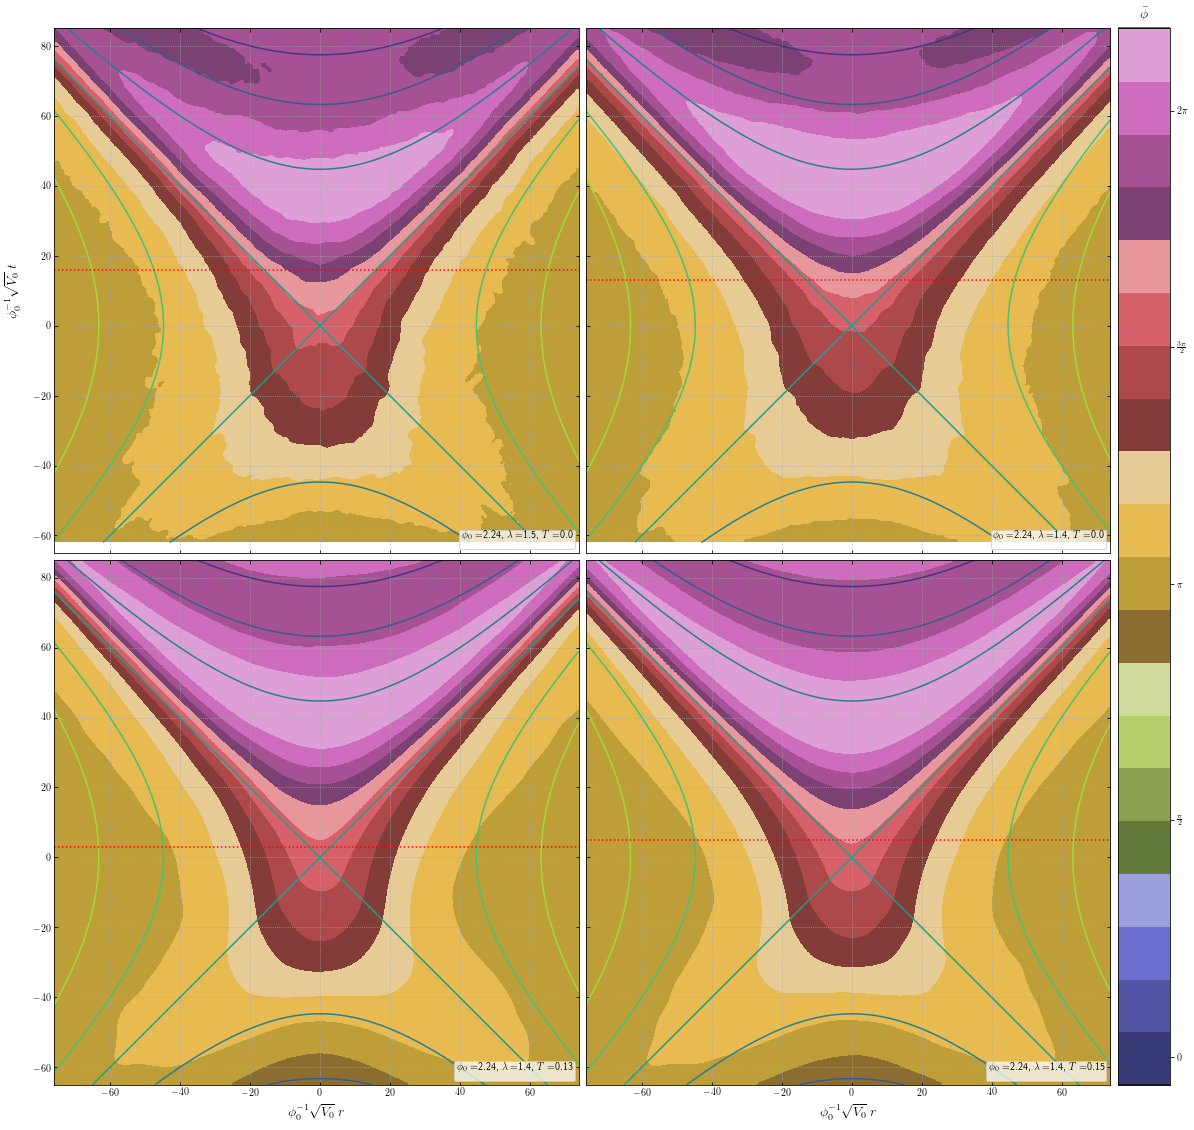

In [3]:
from mpl_toolkits.axes_grid1 import ImageGrid

tp = 0# 0 for average, 1 for error
cp = 0# 0 - field, 1 - momentum, 2 - gradient

fig = plt.figure(figsize = (20, 20))
grid = ImageGrid(fig, 111, nrows_ncols=(2, len(bubbleList)//2), share_all=True, axes_pad=0.1, cbar_location="right", cbar_mode="single")
im = [[]]*len(bubbleList)
for ii, average_bubble in enumerate(bubbleList):
    tmp = tmpLoaded[ii]
    temp = tempList[tmp]
    lamb = lambList[tmp]

    phieq = np.pi
    valmin, valmax = phieq, phieq
    sigmafld = fluct_stdev(lamb, phi0, temp)
    win = 75
    critSize = 30

    ### Useful
    right_Vmax  = sco.minimize_scalar(Vinv, args=lamb, bounds=(np.pi, 2*np.pi), method='bounded')
    left_Vmax   = sco.minimize_scalar(Vinv, args=lamb, bounds=(0    ,   np.pi), method='bounded')
    crit_thresh = right_Vmax.x+2.*sigmafld

    nT, nN = np.shape(average_bubble[0,0])
    tcen, xcen  = find_nucleation_center2(average_bubble[0,0], phieq, crit_thresh, critSize)
    tl, tr      = max(0, tcen-win), min(nT-1, tcen+win)
    xl, xr      = max(0, xcen-win), min(nN-1, xcen+win)
        
    bubble2plot = average_bubble[tp,cp]
    bubble2plot = bubble2plot[tl:tr,xl:xr]

    bubble2measure = average_bubble[0,0][tl:tr,xl:xr]
    nT, nN = np.shape(bubble2measure)
    tcen, xcen = find_nucleation_center2(bubble2measure, phieq, crit_thresh, critSize)
    xcen = xcen+1
    if ii==0:
        tcen = tcen-13
    elif ii==1:
        tcen = tcen-13
    elif ii==2 or ii==3:
        tcen = tcen-10
    ext  = np.asarray([(-xcen), (nN-xcen), (-tcen), (nT-tcen)])

    if np.amin(bubbleList) < valmin: valmin = np.amin(bubbleList)
    if np.amax(bubbleList) > valmax: valmax, maxable = np.amax(bubbleList), ii

    labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    lsl = ('-' if tmp==0 else '--' if tmp==1 else ':')

    grid[ii].legend(title=labs, loc=4, fontsize='small', fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
    
    x = np.linspace(ext[0], ext[1], 1000)
    t = np.linspace(ext[2], ext[3], 1000)
    xx,yy = np.meshgrid(x, t)
    zz = xx**2. - yy**2.
    grid[ii].contour(xx, yy, zz, ncontours=20)

    im[ii] = grid[ii].imshow(bubble2plot, interpolation='gaussian', extent=ext, origin='lower', cmap='tab20b')
    im[ii].set_clim(vmin=valmin, vmax=valmax)
    cbar = grid[ii].cax.colorbar(im[maxable], \
                                 ticks=matplotlib.ticker.MultipleLocator(np.pi/2),\
                                format = matplotlib.ticker.FuncFormatter(multiple_formatter()))

    grid[ii].cax.toggle_label(True)
    grid[ii].cax.set_title(r'$\bar{\phi}$')
    grid[ii].tick_params(direction='in', which='both', top=True, right=True)
    grid[ii].set(xlabel=r'$\phi_0^{-1} \sqrt{V_0} \; r$')

    if ii == 0:
        indmin = int(indList[ii])+18
    elif ii == 1:
        indmin = int(indList[ii])+18
    elif ii == 2:
        indmin = int(indList[ii])+13
    elif ii == 3:
        indmin = int(indList[ii])+16
        
    grid[ii].axhline((indmin-tl+1-tcen), ls=':', color='r')

    grid[ii].grid(True, ls=':', color='darkgray')
    grid[0].set(ylabel=r'$\phi_0^{-1} \sqrt{V_0} \; t$')
plt.show()


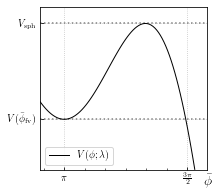

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (3, 3))
cols = cycle(['orange', 'darkgreen', 'violet', 'orangered'])

lsl = ('-' if tmp==1 else '--' if tmp==0 else ':' if tmp==2 else '-.')

extphi = np.linspace(0.8*np.pi, 1.53*np.pi, 100)

plt.axhline(V(np.pi, lamb), ls=':', color='gray')
#plt.axvline(np.pi, ls='-', color='gray')
plt.axhline(V(right_Vmax.x, lamb), ls=':', color='gray')
#plt.axvline(right_Vmax.x, ls=':', color='gray')
plt.ylim((0.015, 0.0182))
plt.xlim((0.9*np.pi, 1.58*np.pi))
plt.grid(ls=':', color='gray', alpha=0.5)
plt.xlabel(r'$\bar{\phi}$')

plt.plot(extphi, V(extphi, lamb), ls='-', linewidth=1, color='k', label=r'$V(\phi;\lambda)$')

a=ax.get_yticks().tolist()[1:6:4]
a[0]=V(np.pi, lamb)
a[1]=V(right_Vmax.x, lamb)
ax.set_yticks(a)
ax.set_yticklabels([r'$V(\bar{\phi}_{\rm fv})$', r'$V_{\rm sph}$'])

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax.tick_params(which='both', axis="y", direction="in")
ax.tick_params(which='both', axis="x", direction="in")
ax.xaxis.set_label_coords(1.01, -0.02)

plt.legend()
plt.savefig('./data/sphaleron_potential.pdf', rasterize=True); plt.show()
plt.show()

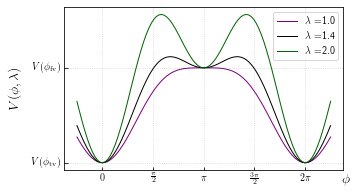

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (5, 3))

cols = cycle(['darkgreen', 'purple'][::-1])

lsl = ('-' if tmp==1 else '--' if tmp==0 else ':' if tmp==2 else '-.')

extphi2 = np.linspace(-0.25*np.pi, 2.25*np.pi, 100)

lamb = 1.
labs = r'$\lambda=$'+str(lamb)
plt.plot(extphi2, V(extphi2, lamb), ls='-', color=next(cols), linewidth=1, label=labs)

lamb = 1.4
labs = r'$\lambda=$'+str(lamb)
plt.plot(extphi2, V(extphi2, lamb), ls='-', color='k', linewidth=1, label=labs)

lamb = 2.
labs = r'$\lambda=$'+str(lamb)
plt.plot(extphi2, V(extphi2, lamb), ls='-', color=next(cols), linewidth=1, label=labs)

plt.grid(ls=':', color='darkgray', alpha=0.5)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$V(\phi, \lambda)$')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax.tick_params(which='both', axis="y", direction="in")
ax.tick_params(which='both', axis="x", direction="in")
ax.xaxis.set_label_coords(1.01, -0.02)

a=ax.get_yticks().tolist()[-2:]
a[0]=V(np.pi, lamb)
a[1]=V(2.*np.pi, lamb)
ax.set_yticks(a)
ax.set_yticklabels([r'$V(\phi_{\rm fv})$',r'$V(\phi_{\rm tv})$'])

plt.legend()
plt.savefig('./data/bare_potential_comparisons.pdf', rasterize=True)
plt.show()


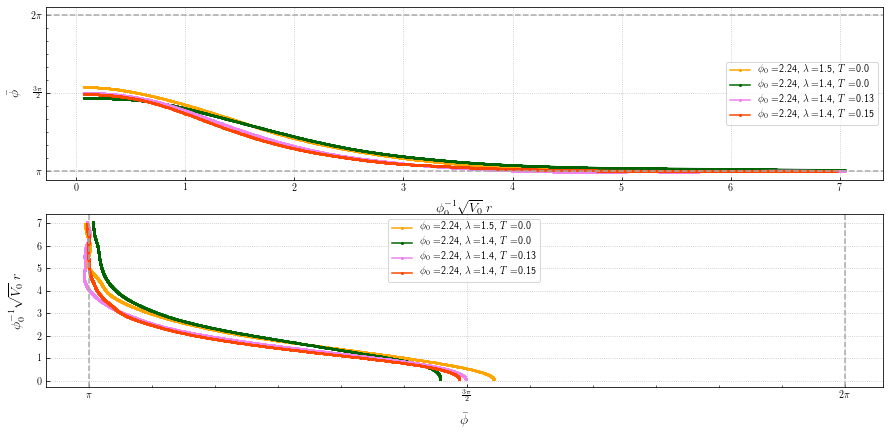

In [6]:
fig, ax = plt.subplots(2, 1, figsize = (15, 7))
cols = cycle(['orange', 'darkgreen', 'violet', 'orangered'])

fvrecoList = []
for ii, average_bubble in enumerate(bubbleList):

    indmin = int(indList[ii])
    tmp = tmpLoaded[ii]
    temp = tempList[tmp]
    lamb = lambList[tmp]
    col = next(cols)

    data   = average_bubble[0,0,indmin]
    if temp==0: data = gaussian_filter(data, 4, mode='nearest')

    xpeak  = np.argmax(data)
    data   = data[:xpeak+1]

    xstart = np.argwhere(data>phieq).flatten()
    xstart = 200

    data   = data[xstart:xpeak+1:][::-1]
    xlist  = np.linspace(1., len(data), len(data))*dx2plot
    ax[0].plot(xlist, data, color=col, ls='-')

    spline     = scp.interpolate.splrep(xlist, data)    # interpolate mean field
    der1spline = scp.interpolate.splder(spline, n=1)    # take tangent to this curve
    der2spline = scp.interpolate.splder(spline, n=2)    # take tangent to tangent curve

    rr = np.linspace(xlist[0], xlist[-1], 1000)
    phifv    = scp.interpolate.splev(rr, spline)
    dphidr   = scp.interpolate.splev(rr, der1spline)
    ddphiddr = scp.interpolate.splev(rr, der2spline)

    if temp==0:
        dVdr = scp.interpolate.splrep(rr, (ddphiddr + dphidr/(rr/np.sqrt(4*nu)))*dphidr )
        #dVdr = scp.interpolate.splrep(rr, (ddphiddr + dphidr/rr)*dphidr )
    else:
        dVdr = scp.interpolate.splrep(rr, ddphiddr*dphidr )

    Vantider = scp.interpolate.splantider(dVdr, n=1)
    Vofrofphi = scp.interpolate.splev(rr, Vantider)

    fvrecoList.append(np.asarray([tmp, temp, lamb, phi0, rr, phifv, dphidr, ddphiddr, Vofrofphi]))

    labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
    lsl = ('-' if tmp==1 else '--' if tmp==0 else ':' if tmp==2 else '-.')

    ax[0].plot(rr, phifv, color=col, ls=None, marker='o', ms=2, label=labs)
    ax[1].plot(phifv, rr, color=col, ls=None, marker='o', ms=2, label=labs)

ax[0].set_ylabel(r'$\bar{\phi}$')
ax[0].set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; r$')
ax[1].set_ylabel(r'$\phi_0^{-1} \sqrt{V_0} \; r$')
ax[1].set_xlabel(r'$\bar{\phi}$')

ax[0].yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax[0].yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax[1].xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax[1].xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

ax[0].axhline(np.pi, ls='--', color='darkgray')
ax[0].axhline(2.*np.pi, ls='--', color='darkgray')
ax[1].axvline(np.pi, ls='--', color='darkgray')
ax[1].axvline(2.*np.pi, ls='--', color='darkgray')

for axx in ax:
    axx.tick_params(which='both', axis="y", direction="in")
    axx.tick_params(which='both', axis="x", direction="in")
    axx.grid(ls=':', color='gray', alpha=0.5)
    axx.legend()
plt.show()

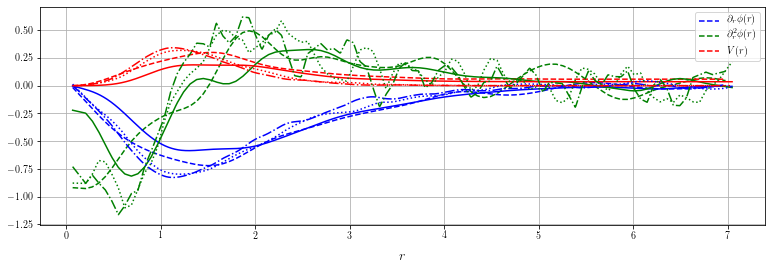

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (13, 4))
for ii, lists in enumerate(fvrecoList):
    tmp, temp, lamb, phi0, rinv, phifv, dphidr, ddphiddr, Vofrofphi = lists

    lsl = ('-' if tmp==1 else '--' if tmp==0 else ':' if tmp==2 else '-.')
    ax.plot(rinv, dphidr, 'b', ls=lsl, label=(f'$\partial_r \phi(r)$' if ii==0 else None))
    ax.plot(rinv, ddphiddr, 'g', ls=lsl, label=(f'$\partial_r^2 \phi(r)$' if ii==0 else None))
    ax.plot(rinv, Vofrofphi, 'r', ls=lsl, label=(f'$V(r)$' if ii==0 else None))

ax.set_xlabel(r'$r$'); ax.legend(); ax.grid(); plt.show()


# The Roll 

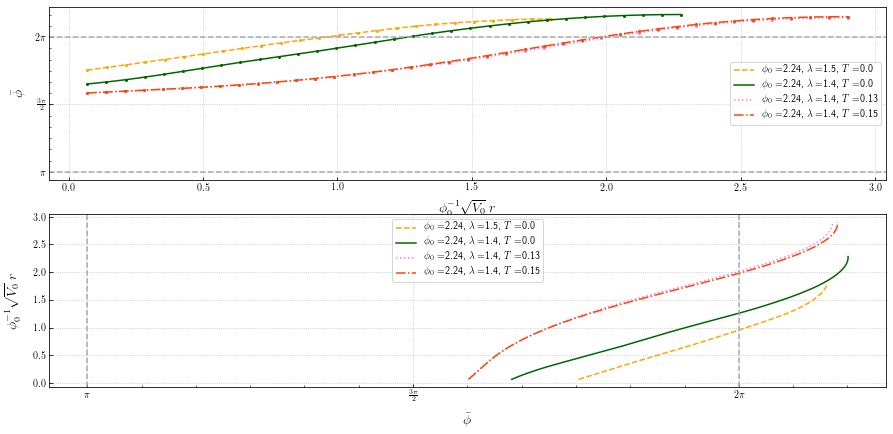

In [8]:
if True:
    fig, ax = plt.subplots(2, 1, figsize = (15, 7))
    cols = cycle(['orange', 'darkgreen', 'violet', 'orangered'])

    rollrecoList = []
    for ii, average_bubble in enumerate(bubbleList):

        if ii == 0:
            indmin = int(indList[ii])+15
        elif ii == 1:
            indmin = int(indList[ii])+15
        elif ii == 2 or ii == 3:
            indmin = int(indList[ii])+10

        tmp = tmpLoaded[ii]
        temp = tempList[tmp]
        lamb = lambList[tmp]

        col = next(cols)
        off = 1
        xpeak = np.argmax(average_bubble[0,0,indmin+off])
        data  = average_bubble[0,0][:, xpeak]
        if temp==0: data = gaussian_filter(data, 2, mode='nearest')
        data  = data[indmin+off:]

        tstop = np.argmax(data)
        data  = data[:tstop+1]

        tlist = (off + np.linspace(0, len(data), len(data)))*dt2plot

        spline     = scp.interpolate.splrep(tlist, data)    # interpolate mean field
        der1spline = scp.interpolate.splder(spline, n=1)    # take tangent to this curve
        der2spline = scp.interpolate.splder(spline, n=2)    # take tangent to tangent curve

        rt       = np.linspace(tlist[0], tlist[-1], 1000)
        phiroll  = scp.interpolate.splev(rt, spline)
        dphidr   = scp.interpolate.splev(rt, der1spline)
        ddphiddr = scp.interpolate.splev(rt, der2spline)

        # integrate product of derivatives above to get potential function of r
        dVdr = scp.interpolate.splrep(rt, - (ddphiddr + dphidr/(rt/np.sqrt(4*nu)))*dphidr )
        #dVdr = scp.interpolate.splrep(rt, - (ddphiddr + dphidr/rt)*dphidr )

        Vantider = scp.interpolate.splantider(dVdr, n=1)
        Vofrofphi = scp.interpolate.splev(rt, Vantider)

        rollrecoList.append(np.asarray([tmp, temp, lamb, phi0, rt, phiroll, dphidr, ddphiddr, Vofrofphi]))

        labs = r'$\phi_0=$'+str('%.2f'%phi0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)
        lsl = ('-' if tmp==1 else '--' if tmp==0 else ':' if tmp==2 else '-.')

        ax[0].plot(tlist, data , color=col, ls='None', marker='o', ms=2)
        ax[0].plot(rt, phiroll, color=col, ls=lsl, label=labs)
        ax[1].plot(phiroll, rt , color=col, ls=lsl, label=labs)

    ax[0].set_ylabel(r'$\bar{\phi}$')
    ax[0].set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; r$')
    ax[1].set_ylabel(r'$\phi_0^{-1} \sqrt{V_0} \; r$')
    ax[1].set_xlabel(r'$\bar{\phi}$')

    ax[0].yaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax[0].yaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
    ax[0].yaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    ax[1].xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax[1].xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
    ax[1].xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

    ax[0].axhline(np.pi, ls='--', color='darkgray')
    ax[0].axhline(2.*np.pi, ls='--', color='darkgray')
    ax[1].axvline(np.pi, ls='--', color='darkgray')
    ax[1].axvline(2.*np.pi, ls='--', color='darkgray')

    for axx in ax:
        axx.tick_params(which='both', axis="y", direction="in")
        axx.tick_params(which='both', axis="x", direction="in")
        axx.grid(ls=':', color='gray', alpha=0.5)
        axx.legend()
    plt.show()


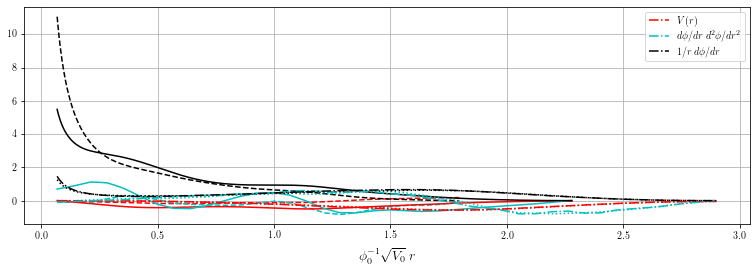

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (13, 4))
for ii, lists in enumerate(rollrecoList):
    tmp, temp, lamb, phi0, ts, phiroll, dphidr, ddphiddr, Vofrofphi = lists

    lsl = ('-' if tmp==1 else '--' if tmp==0 else ':' if tmp==2 else '-.')

    ax.plot(ts, Vofrofphi       , 'r', ls=lsl, label=(f'$V(r)$' if ii==3 else None))
    ax.plot(ts, dphidr*ddphiddr , 'c', ls=lsl, label=(f'$d\phi/dr \; d^2\phi/dr^2$' if ii==3 else None))
    ax.plot(ts, dphidr**2./ts   , 'k', ls=lsl, label=(f'$1/r \; d\phi/dr$' if ii==3 else None))

ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; r$'); ax.legend(); ax.grid(); plt.show()


# Full reconstruction

In [10]:
fit_to_V = lambda x, la, a,c: ( -np.cos(x) + 0.5 * la**2. * np.sin(x)**2. - a) * c


bare 0.0076799999999999985 1.4 effective 0.006316466137447826 1.3132941000121556
bare 0.0076799999999999985 1.4 effective 0.010369183711135427 1.3974031127743436


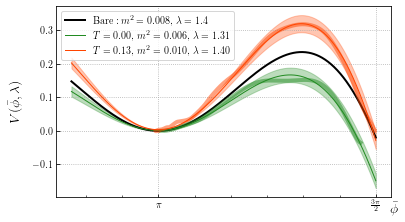

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (6, 3.5))
extphi = np.linspace(phieq*0.8, np.pi*3./2., 800)
cmap1 = get_cmap(5)
cmapsp = ['#e60049', '#0bb4ff', '#50e991', '#e6d800', '#9b19f5', '#ffa300', '#dc0ab4', '#b3d4ff', '#00bfa0']
cych = cycle([cmap1(0), 'forestgreen', 'orangered', cmapsp[4]])

for ii in range(len(rollrecoList)):
    col = next(cych)

    tmp, temp, lamb, phi0, r, phifv, dphidr, ddphiddr, Vfvofrofphi = fvrecoList[ii]
    Vfvofrofphi = Vfvofrofphi - Vfvofrofphi[np.argmin(np.abs(phifv-np.pi))]

    if lamb==1.5 or temp==0.15: continue
    if ii==1:
        plt.plot(extphi, V2(extphi, lamb)-1., ls='-', linewidth=2, color='k', label=r'${\rm Bare: \,}$'+r'$m^2=%5.3f, \, \lambda=%5.1f$'%(m2(lamb),lamb))

    plt.plot(phifv, Vfvofrofphi, color=col, alpha=0.5, linewidth=4)

    xlist = phifv
    curve = Vfvofrofphi
    popt, _ = scp.optimize.curve_fit(fit_to_V, xlist, curve)

    curve2 = Vfvofrofphi*(4.*nu)
    popt2, _ = scp.optimize.curve_fit(fit_to_V, xlist, curve2)
    spline = scp.interpolate.splrep(extphi, fit_to_V(extphi, *popt2))
    seconder = scp.interpolate.splev(phieq, scp.interpolate.splder(spline, n=2))

    print('bare', m2(lamb), lamb, 'effective', seconder, popt[0])
    plt.plot(extphi, fit_to_V(extphi, *popt), color=col, linewidth=1, label=r'$T=%5.2f, \, m^2=%5.3f, \, \lambda=%5.2f$'%(temp, seconder, popt[0]))

    extpos = extphi[extphi>phieq]
    aM = np.argmax(fit_to_V(extpos, *popt))
    
    if ii==2:
        topp = 1.08
        boot = 0.92
    else:
        topp = 1.13
        boot = 0.87

    alim = np.concatenate((fit_to_V(extpos, *popt)[:aM]*topp, fit_to_V(extpos, *popt)[aM:] + (fit_to_V(extpos, *popt)[aM]*topp - fit_to_V(extpos, *popt)[aM])))
    blim = np.concatenate((fit_to_V(extpos, *popt)[:aM]*boot, fit_to_V(extpos, *popt)[aM:] - (fit_to_V(extpos, *popt)[aM] - fit_to_V(extpos, *popt)[aM]*boot)))

    plt.fill_between(extpos, alim, blim, color=col, alpha=0.3)
    
    #plt.fill_between(extpos[:aM], fit_to_V(extpos, *popt)[:aM]*topp, \
    #                              fit_to_V(extpos, *popt)[:aM]*boot, color=col, alpha=0.5)
    #plt.fill_between(extpos[aM:], fit_to_V(extpos, *popt)[aM:] + (fit_to_V(extpos, *popt)[aM]*topp - fit_to_V(extpos, *popt)[aM]), \
    #                              fit_to_V(extpos, *popt)[aM:] - (fit_to_V(extpos, *popt)[aM] - fit_to_V(extpos, *popt)[aM]*boot), color=col, alpha=0.5)
    

    extneg = extphi[extphi<=phieq]
    plt.fill_between(extneg, fit_to_V(extneg, *popt)*topp, fit_to_V(extneg, *popt)*boot, color=col, alpha=0.3)

plt.grid(True, ls=':', color='darkgray')
plt.xlabel(r'$\bar{\phi}$'); plt.ylabel(r'$V(\bar{\phi}, \lambda)$')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax.tick_params(which='both', axis="y", direction="in")
ax.tick_params(which='both', axis="x", direction="in")
ax.xaxis.set_label_coords(1.01, -0.02)
plt.legend()
plt.savefig('./data/effectiveV_bounce_reconstruction.pdf', rasterize=True)
plt.show()

In [12]:
    # compare:
    def m2reno(ii):
        temp     = tempList[ii]
        lamb     = lambList[ii]
        sigmafld = fluct_stdev(lamb, phi0, temp)
        m2u = lamb**2. - 1.

        kUV = 2.*np.pi/lenLat*(knyq-1 + 0.5)
        kIR = np.pi/lenLat

        sigmasqreno = np.log((kUV+np.sqrt(kUV**2.+m2u))/(kIR+np.sqrt(kIR**2.+m2u)))
        sigmasqreno = sigmasqreno/phi0**2./2./np.pi
        ddddV = 4.*lamb**2. - 1.
        m2reno = m2u - 0.5*sigmasqreno*ddddV
        return m2reno*4.*nu


1.4413408646566364 0.9958468451481247 0.8106097062149908
Bare mass, curvature mass, lattice reno mass: 0.01 0.0069871883563967325 0.007975083226439155


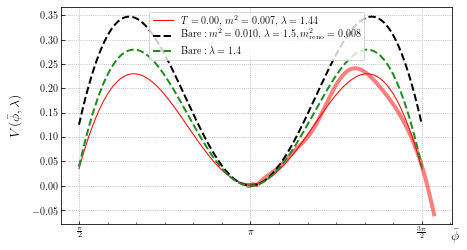

1.3132941000121556 0.999106015908725 1.0894357427857158
Bare mass, curvature mass, lattice reno mass: 0.0076799999999999985 0.00631644030551732 0.005838383776923149


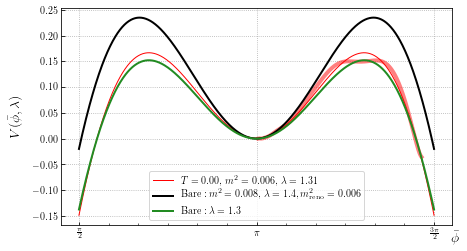

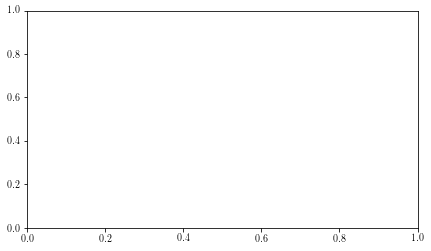

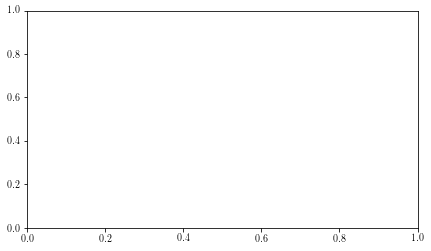

In [13]:
for ii in range(len(rollrecoList)):
    fig, ax = plt.subplots(1, 1, figsize = (7, 4))
    extphi = np.linspace(phieq/2., np.pi*3./2., 800)
    cmap1 = get_cmap(5)
    cmapsp = ['#e60049', '#0bb4ff', '#50e991', '#e6d800', '#9b19f5', '#ffa300', '#dc0ab4', '#b3d4ff', '#00bfa0']
    cych = cycle([cmap1(0), 'forestgreen', 'orangered', cmapsp[4]])

    col = next(cych)

    tmp, temp, lamb, phi0, r, phifv, dphidr, ddphiddr, Vfvofrofphi = fvrecoList[ii]
    Vfvofrofphi = Vfvofrofphi - Vfvofrofphi[np.argmin(np.abs(phifv-np.pi))]

    if temp!=0.: continue

    plt.plot(phifv, Vfvofrofphi, color=col, alpha=0.5, linewidth=4)

    xlist = phifv
    curve = Vfvofrofphi
    popt, _ = scp.optimize.curve_fit(fit_to_V, xlist, curve)

    curve2 = Vfvofrofphi*(4.*nu)
    popt2, _ = scp.optimize.curve_fit(fit_to_V, xlist, curve2)
    spline = scp.interpolate.splrep(extphi, fit_to_V(extphi, *popt2))
    seconder = scp.interpolate.splev(phieq, scp.interpolate.splder(spline, n=2))

    print(*popt)
    print('Bare mass, curvature mass, lattice reno mass:', m2(lamb), seconder, m2reno(ii))
    plt.plot(extphi, fit_to_V(extphi, *popt), color=col, linewidth=1, label=r'$T=%5.2f, \, m^2=%5.3f, \, \lambda=%5.2f$'%(temp, seconder, popt[0]))

    extpos = extphi[extphi>phieq]
    aM = np.argmax(fit_to_V(extpos, *popt))

    if ii<=1:
        plt.plot(extphi, V2(extphi, lamb)-1., ls=('--' if lamb==1.5 else '-'), linewidth=2, color='k', label=r'${\rm Bare: \,}$'+r'$m^2=%5.3f, \, \lambda=%5.1f, m^2_{\rm reno}=%5.3f$'%(m2(lamb),lamb,m2reno(ii)))
        plt.plot(extphi, V2(extphi, popt[0])-1., ls=('--' if lamb==1.5 else '-'), linewidth=2, color='forestgreen', label=r'${\rm Bare: \,}$'+r'$\lambda=%5.1f$'%(popt[0]))


    plt.grid(True, ls=':', color='darkgray')
    plt.xlabel(r'$\bar{\phi}$'); plt.ylabel(r'$V(\bar{\phi}, \lambda)$')
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
    ax.tick_params(which='both', axis="y", direction="in")
    ax.tick_params(which='both', axis="x", direction="in")
    ax.xaxis.set_label_coords(1.01, -0.02)
    plt.legend()
    plt.savefig('./data/effectiveV_bounce_reconstruction.pdf', rasterize=True)
    plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

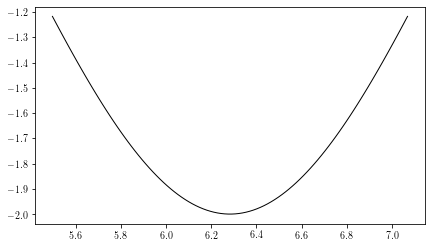

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (7, 4))
extphi = np.linspace(3.5/2.*np.pi, 4.5/2.*np.pi, 100)

for ii in range(len(rollrecoList)):
   # if ii==0 or ii==1: continue
    col = next(cych)

    tmp, temp, lamb, phi0, ts, phiroll, dphidr, ddphiddr, Vrollofrofphi = rollrecoList[ii]
    tmp, temp, lamb, phi0, r, phifv, dphidr, ddphiddr, Vfvofrofphi = fvrecoList[ii]

    if lamb==1.5 or temp==0.15: continue
    if ii==1:
        plt.plot(extphi, V2(extphi, lamb)-1., ls='-', linewidth=1, color='k', label=r'${\rm Bare \, potential: \,}$'+r'$\lambda=%5.1f, \, m^2=%5.3f$'%(lamb, m2(lamb)))
        
    #plt.plot(phiroll, Vrollofrofphi, color=col, alpha=0.5, linewidth=4)

    xlist = phiroll
    curve = Vrollofrofphi
    popt, _ = scp.optimize.curve_fit(fit_to_V, xlist, curve)

    curve2 = Vrollofrofphi*(4.*nu)
    popt2, _ = scp.optimize.curve_fit(fit_to_V, xlist, curve2)
    spline = scp.interpolate.splrep(extphi, fit_to_V(extphi, *popt2))
    seconder = scp.interpolate.splev(phieq, scp.interpolate.splder(spline, n=2))

    print(*popt)
    plt.plot(extphi, fit_to_V(extphi, *popt), color=col, label=r'$T=%5.2f, \, m^2=%5.3f, \, \lambda=%5.2f$'%(temp, seconder, popt[0]))

plt.grid(True, ls=':', color='darkgray')
plt.xlabel(r'$\bar{\phi}$'); plt.ylabel(r'$V(\bar{\phi}, \lambda)$')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax.tick_params(which='both', axis="y", direction="in")
ax.tick_params(which='both', axis="x", direction="in")
ax.xaxis.set_label_coords(1.01, -0.02)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (7, 4))
extphi = np.linspace(phieq*0.8, 2.*np.pi*1.1, 100)

for ii in range(len(rollrecoList)):
    col = next(cych)

    tmp, temp, lamb, phi0, ts, phiroll, dphidr, ddphiddr, Vrollofrofphi = rollrecoList[ii]
    tmp, temp, lamb, phi0, r, phifv, dphidr, ddphiddr, Vfvofrofphi = fvrecoList[ii]
    

    if lamb==1.5 or temp==0.15: continue
    if ii==1:
        plt.plot(extphi, V2(extphi, lamb)-1., ls='-', linewidth=1, color='k', label=r'${\rm Bare \, potential: \,}$'+r'$\lambda=%5.1f, \, m^2=%5.3f$'%(lamb, m2(lamb)))

    plt.plot(phiroll, Vrollofrofphi, color=col, alpha=0.3, linewidth=4)
    plt.plot(phifv, Vfvofrofphi, color=col, alpha=0.3, linewidth=4)

    xlist = np.concatenate((phifv, phiroll))
    curve = np.concatenate((Vfvofrofphi, Vrollofrofphi))
    popt, _ = scp.optimize.curve_fit(fit_to_V, xlist, curve)

    curve2 = np.concatenate((Vfvofrofphi, Vrollofrofphi))*(4.*nu)
    popt2, _ = scp.optimize.curve_fit(fit_to_V, xlist, curve2)
    spline = scp.interpolate.splrep(extphi, fit_to_V(extphi, *popt2))
    seconder = scp.interpolate.splev(phieq, scp.interpolate.splder(spline, n=2))

    print(*popt)    
    plt.plot(extphi, fit_to_V(extphi, *popt), color=col, label=r'$T=%5.2f, \, m^2=%5.3f, \, \lambda=%5.2f$'%(temp, seconder, popt[0]))

plt.grid(True, ls=':', color='darkgray')
plt.xlabel(r'$\bar{\phi}$'); plt.ylabel(r'$V(\bar{\phi}, \lambda)$')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
ax.tick_params(which='both', axis="y", direction="in")
ax.tick_params(which='both', axis="x", direction="in")
ax.xaxis.set_label_coords(1.01, -0.02)
plt.legend()
plt.show()